# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/18,0.10,1,0


In [3]:
data.shape

(48895, 16)

# Data Preprocessing

In [4]:
# Convert 'last_review' column to datetime format   
data['last_review'] = pd.to_datetime(data['last_review'])

/var/folders/67/4t6dp9k533z60p8b01gt6cdc0000gn/T/ipykernel_2814/3185721616.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['last_review'] = pd.to_datetime(data['last_review'])


In [5]:
# Define function to categorize review sentiment
def categorize_sentiment(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Apply function to create 'review_sentiment' column
data['review_sentiment'] = data['reviews_per_month'].apply(categorize_sentiment)

In [6]:
# Handle missing values
data.dropna(inplace=True)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_sentiment
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Negative
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Negative
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Positive
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Negative
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,Negative


In [7]:
# Calculate average property price for each review sentiment category
average_price_by_sentiment = data.groupby('review_sentiment')['price'].mean().reset_index()

In [8]:
data.shape

(38821, 17)

# Stakeholder Group 1

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


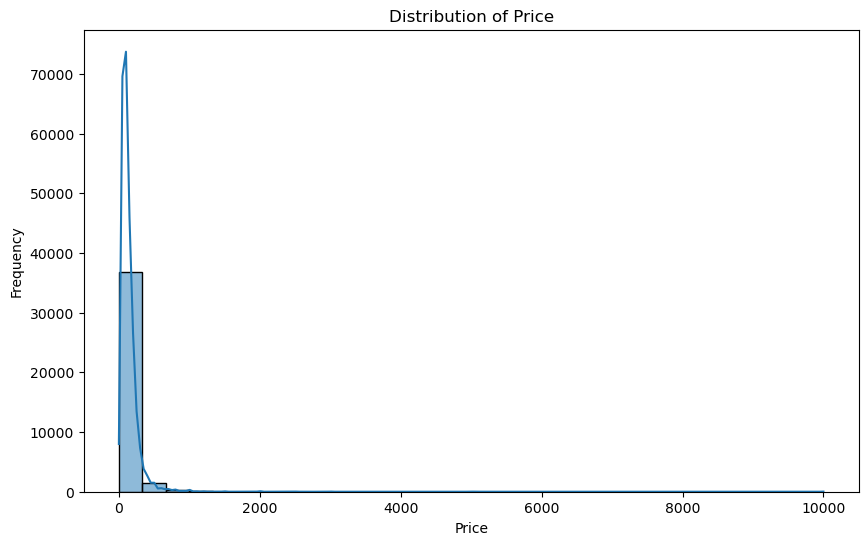

In [29]:
# Distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

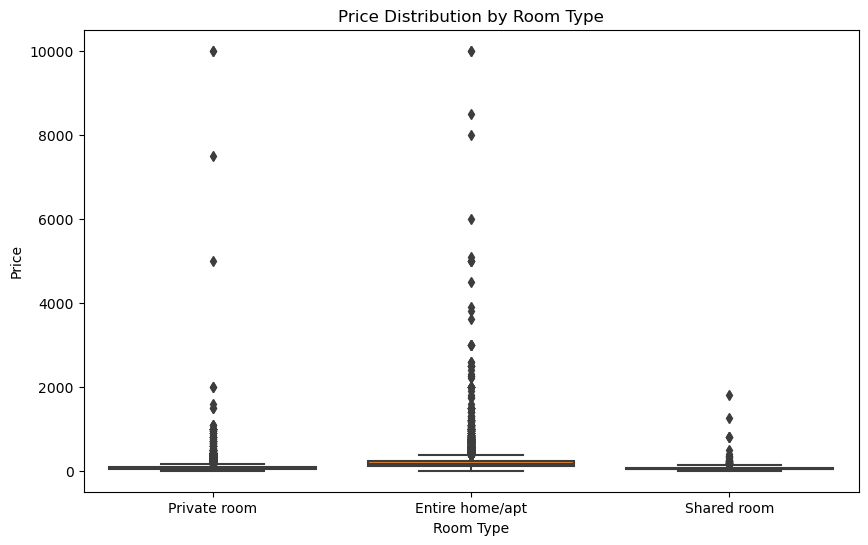

In [10]:
# Relationship between price and room type
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['room_type'], y=data['price'])
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

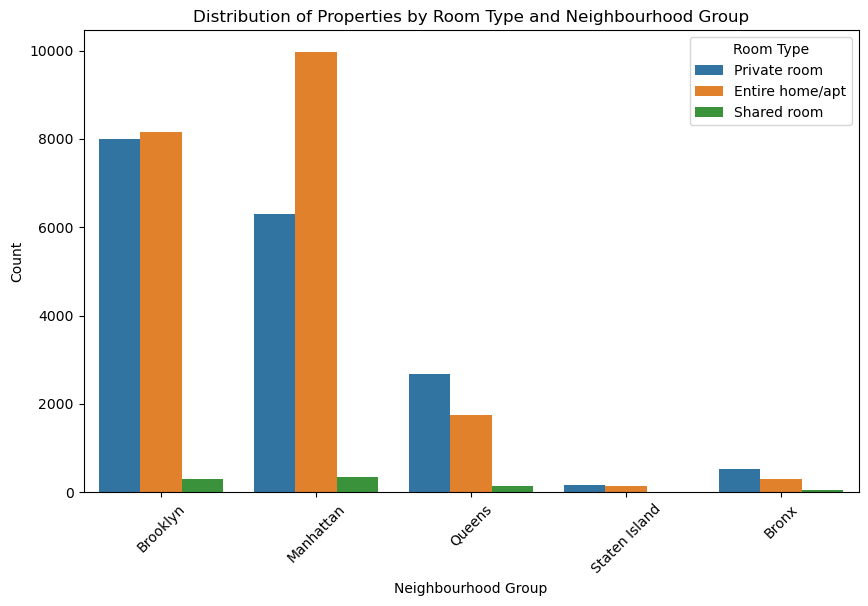

In [11]:
# Understanding the distribution of properties by room type and neighbourhood group
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', hue='room_type', data=data)
plt.title('Distribution of Properties by Room Type and Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

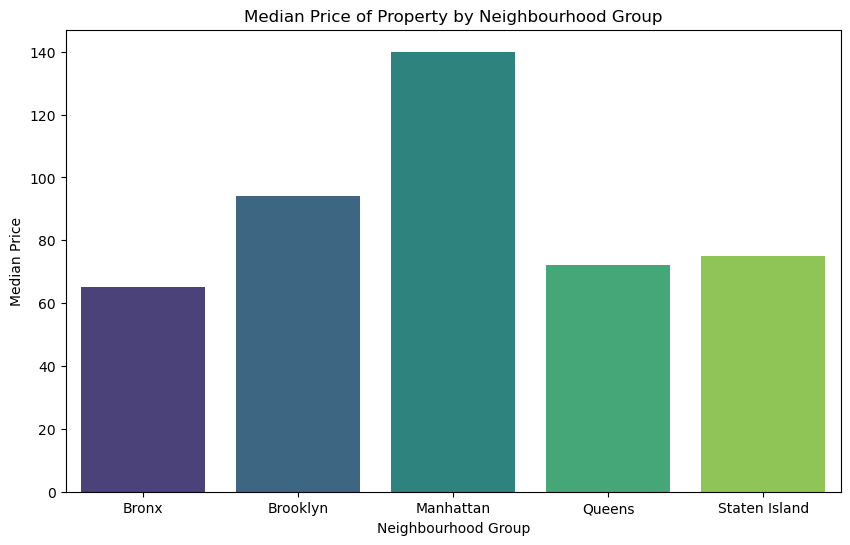

In [12]:
# Calculate the median price for each neighbourhood group
median_price_neighbourhood_group = data.groupby('neighbourhood_group')['price'].median().reset_index()

# Bar plot of median price by neighbourhood group
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', data=median_price_neighbourhood_group, palette='viridis')
plt.title('Median Price of Property by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Median Price')
plt.show()

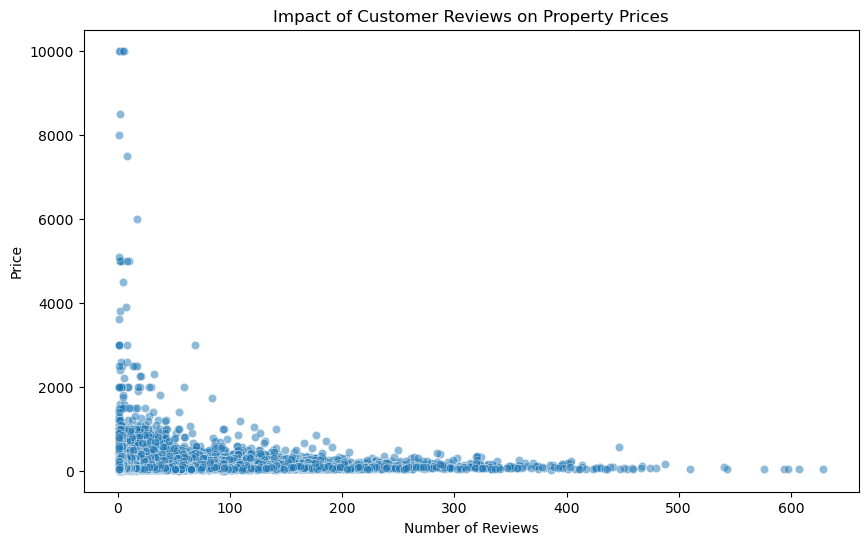

In [13]:
# Evaluating the impact of customer reviews on property prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=data, alpha=0.5)
plt.title('Impact of Customer Reviews on Property Prices')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

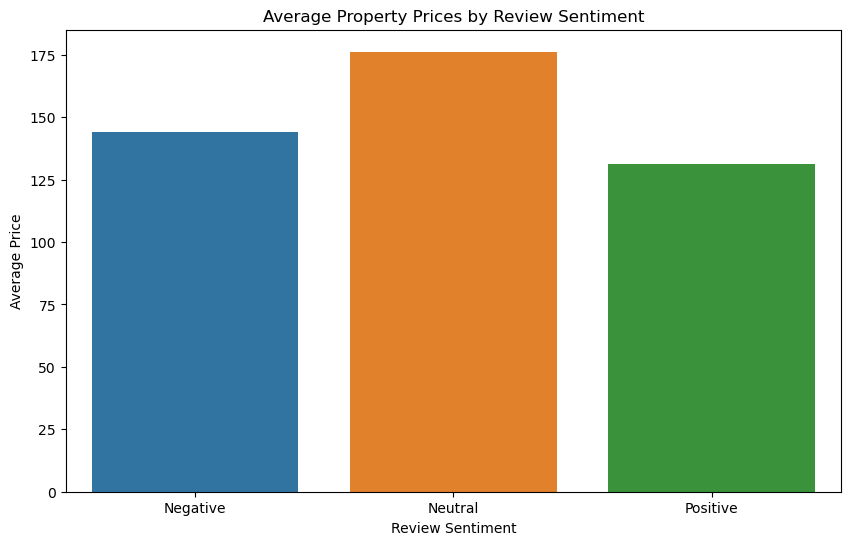

In [14]:
# Bar plot of Property Prices by Review Sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x='review_sentiment', y='price', data=average_price_by_sentiment)
plt.title('Average Property Prices by Review Sentiment')
plt.xlabel('Review Sentiment')
plt.ylabel('Average Price')
plt.show()

In [15]:
# Insights and Recommendations
### Based on the analysis, the stakeholders can focus on:
### 1. Acquiring hosts in neighborhoods with high demand and higher price ranges.
### 2. Categorizing customers based on their preferences for room types and neighborhoods.
### 3. Targeting specific neighborhoods with potential for growth.
### 4. Adjusting pricing strategies based on customer preferences and seasonal trends.
### 5. Improving underperforming properties by making them more customer-oriented.
### 6. Identifying and promoting unpopular properties through targeted marketing strategies.
### 7. Exploring opportunities to expand in popular localities like Manhattan.
### 8. Utilizing machine learning models to predict prices and optimize revenue.

### Further analysis and actions can be tailored based on specific business objectives and requirements.

In [16]:
# **Methodology Document:**

# **1. Data Loading and Preprocessing:**
#    - Loaded the dataset using Pandas.
#    - Converted the 'last_review' column to datetime format.
#    - Created a new column 'review_sentiment' to categorize review sentiment based on the number of reviews per month.
#    - Handled missing values by dropping rows with missing values.

# **2. Visualization of Price Distribution:**
#    - Utilized a histogram to visualize the distribution of property prices.
#    - Plotted the histogram with 30 bins and kernel density estimation to show the frequency distribution of prices.

# **3. Relationship between Price and Room Type:**
#    - Employed a box plot to analyze the relationship between property prices and room types.
#    - Grouped the data by room type and plotted the distribution of prices within each room type category.

# **4. Distribution of Properties by Room Type and Neighbourhood Group:**
#    - Utilized a count plot to understand the distribution of properties by room type and neighborhood group.
#    - Plotted the count of properties based on the combination of room type and neighborhood group, providing insights into the distribution of different property types across neighborhoods.

# **5. Types of Properties Preferred by Customers:**
#    - Utilized a count plot to visualize the distribution of room types preferred by customers.
#    - Plotted the count of properties based on room type, identifying whether customers prefer entire homes/apartments, private rooms, or shared rooms.

# **6. Evaluating the Impact of Customer Reviews on Property Prices:**
#    - Utilized a scatter plot to evaluate the impact of customer reviews on property prices.
#    - Plotted the number of reviews against property prices to analyze any correlation between the two variables.

# **7. Average Property Prices by Review Sentiment:**
#    - Calculated the average property price for each category of review sentiment (positive, neutral, and negative).
#    - Utilized a bar plot to visualize the average property prices by review sentiment, providing insights into how customer reviews sentiment affects property prices.

# This methodology document outlines the steps undertaken for data analysis and visualization, providing insights into various aspects of the dataset related to property prices, room types, neighborhood distribution, and customer reviews sentiment. Each visualization serves to provide valuable insights for stakeholders and decision-makers at Airbnb.

# Stakeholder Group 2

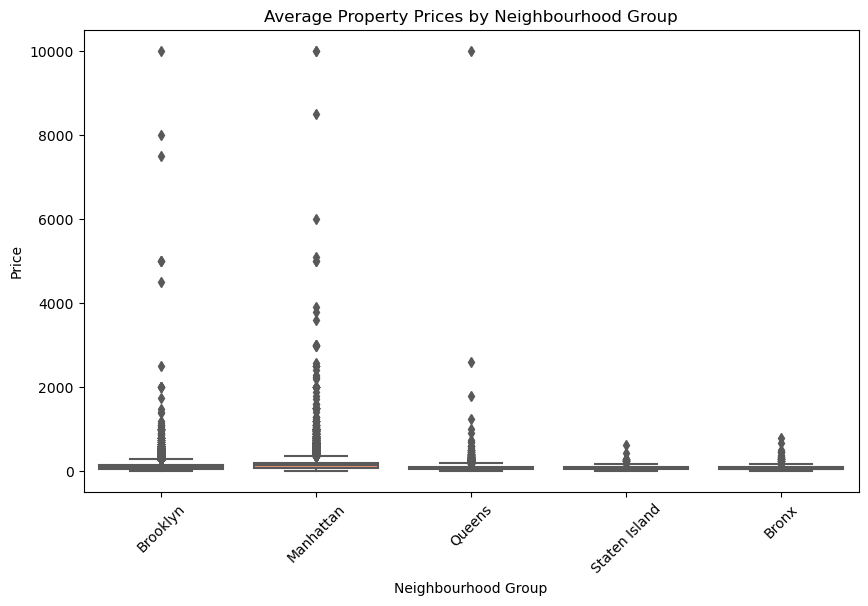

In [17]:
# Comparison of average property prices by neighborhood group
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=data, palette='Set2')
plt.title('Average Property Prices by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

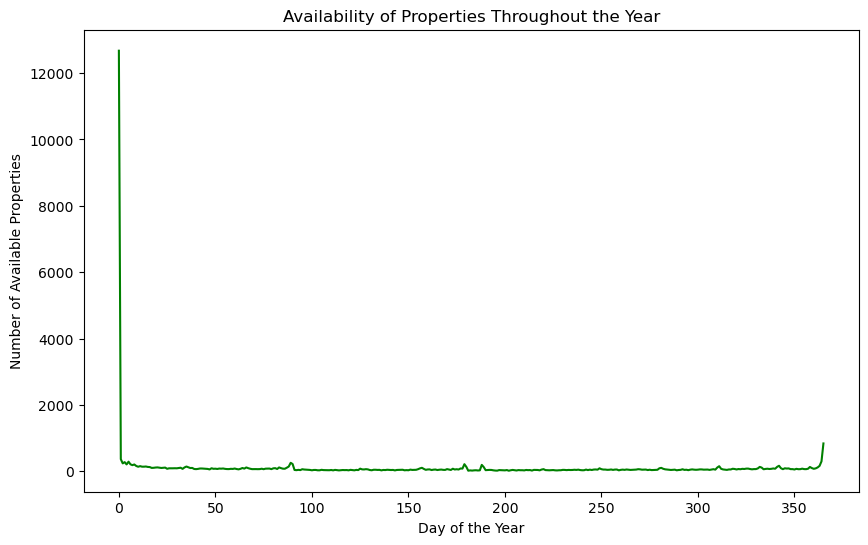

In [18]:
# Visualization of the availability of properties throughout the year
plt.figure(figsize=(10, 6))
availability_counts = data['availability_365'].value_counts().sort_index()
availability_counts.plot(kind='line', color='green')
plt.title('Availability of Properties Throughout the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Number of Available Properties')
plt.show()

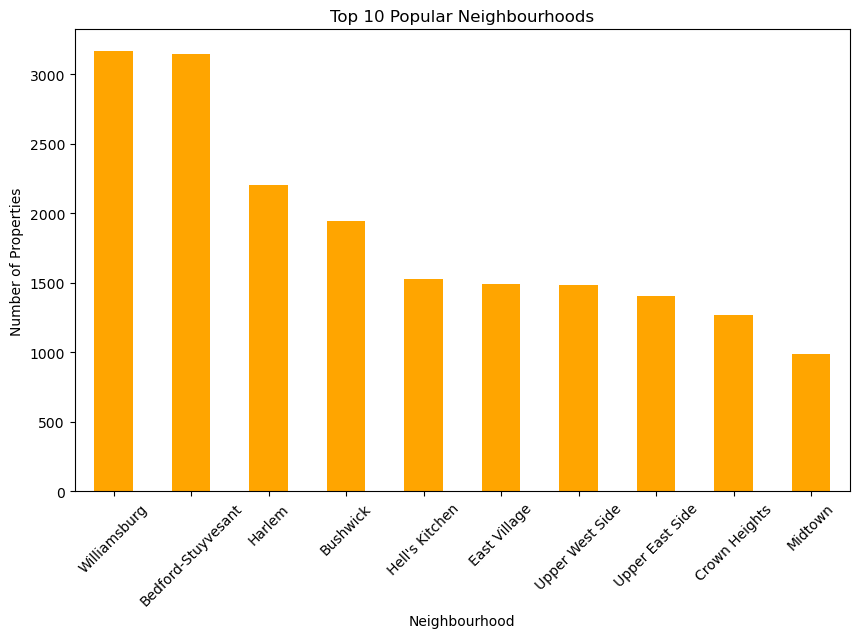

In [19]:
# Comparison of the popularity of properties in different neighborhoods
plt.figure(figsize=(10, 6))
popular_neighbourhoods = data['neighbourhood'].value_counts().head(10)
popular_neighbourhoods.plot(kind='bar', color='orange')
plt.title('Top 10 Popular Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Comparison of the number of bookings per property
plt.figure(figsize=(10, 6))
bookings_per_property = data.groupby('id')['number_of_reviews'].sum()
bookings_per_property = pd.DataFrame(bookings_per_property)
bookings_per_property.head()

,number_of_reviews
id,
2539,9
2595,45
3831,270
5022,9
5099,74


<Figure size 1000x600 with 0 Axes>

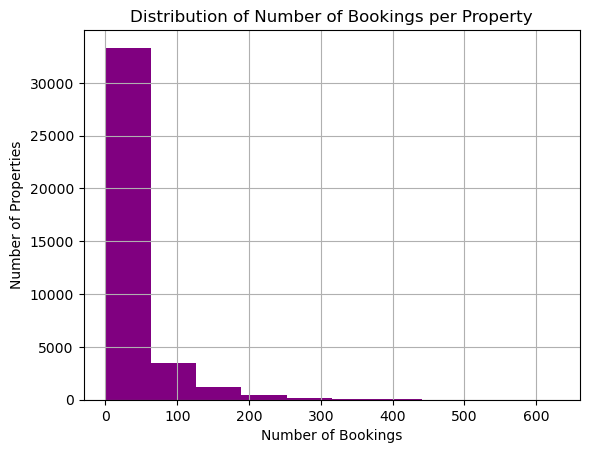

In [21]:
bookings_per_property.hist(bins=10, color='purple')
plt.title('Distribution of Number of Bookings per Property')
plt.xlabel('Number of Bookings')
plt.ylabel('Number of Properties')
plt.show()

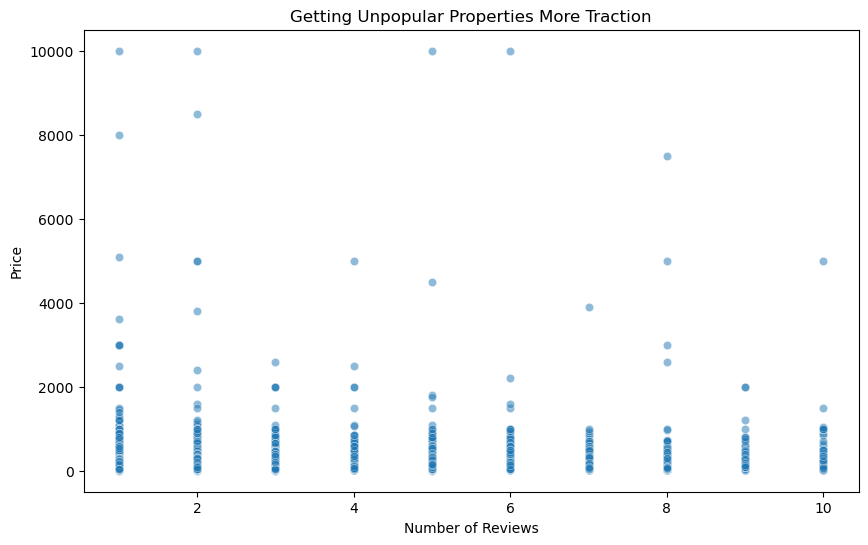

In [22]:
# Visualization for getting unpopular properties more traction
plt.figure(figsize=(10, 6))
unpopular_properties = data[data['number_of_reviews'] <= 10]
sns.scatterplot(x='number_of_reviews', y='price', data=unpopular_properties, alpha=0.5)
plt.title('Getting Unpopular Properties More Traction')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

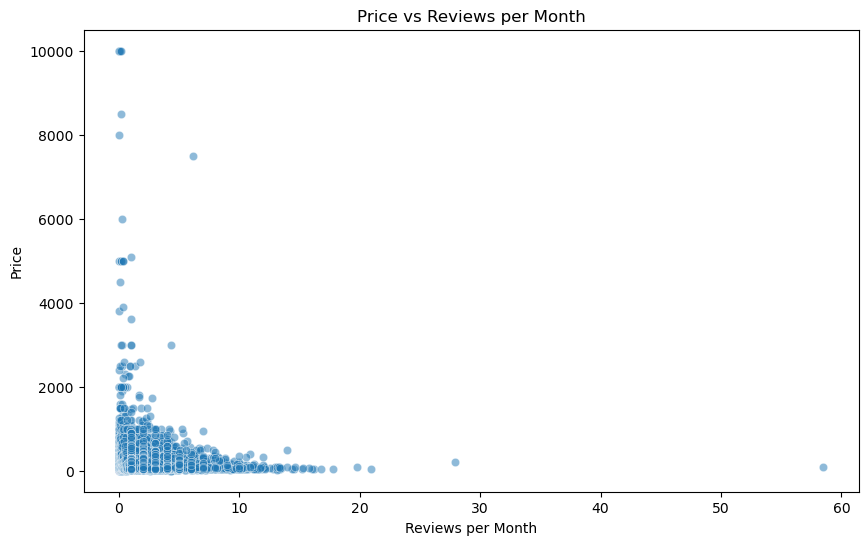

In [23]:
# Scatter plot of price vs reviews per month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews_per_month', y='price', data=data, alpha=0.5)
plt.title('Price vs Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Price')
plt.show()

In [24]:
# Define the bin edges and round off to integer values
bin_edges = np.round(np.linspace(data['calculated_host_listings_count'].min(), data['calculated_host_listings_count'].max(), 10)).astype(int)

# Bin the host ids by calculated_host_listings_count
data['host_listings_bin'] = pd.cut(data['calculated_host_listings_count'], bins=bin_edges)

data['host_listings_bin'].unique()

[(1.0, 37.0], NaN, (37.0, 73.0], (73.0, 110.0], (110.0, 146.0], (218.0, 255.0], (291.0, 327.0]]
Categories (9, interval[int64, right]): [(1, 37] < (37, 73] < (73, 110] < (110, 146] ... (182, 218] < (218, 255] < (255, 291] < (291, 327]]

/var/folders/67/4t6dp9k533z60p8b01gt6cdc0000gn/T/ipykernel_2814/2057254067.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_host = data.groupby(['host_listings_bin', 'room_type', 'host_id'])['price'].mean().reset_index()
/var/folders/67/4t6dp9k533z60p8b01gt6cdc0000gn/T/ipykernel_2814/2057254067.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='host_listings_bin', y='price', hue='room_type', data=avg_price_per_host, ci=None)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

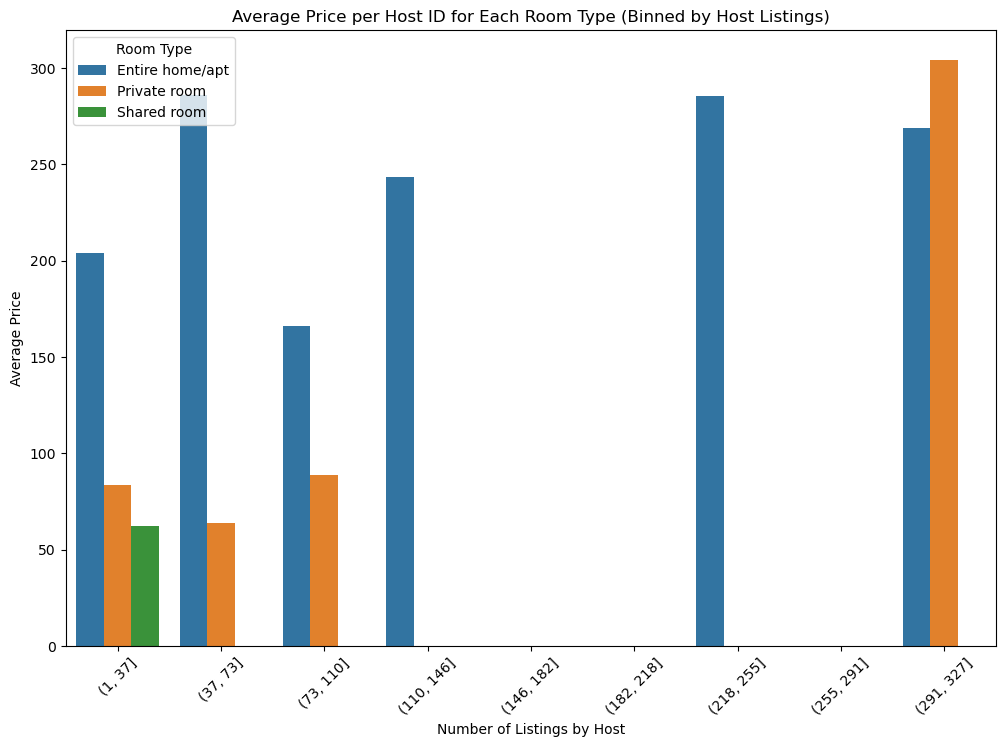

In [25]:
# Calculate the average price per host id for each room type and binned host listings
avg_price_per_host = data.groupby(['host_listings_bin', 'room_type', 'host_id'])['price'].mean().reset_index()

# Bar plot of average price per host id for each room type and binned host listings
plt.figure(figsize=(12, 8))
sns.barplot(x='host_listings_bin', y='price', hue='room_type', data=avg_price_per_host, ci=None)
plt.title('Average Price per Host ID for Each Room Type (Binned by Host Listings)')
plt.xlabel('Number of Listings by Host')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

In [26]:
# **Methodology Document:**

# **1. Data Loading and Preprocessing:**
#    - **Data Loading:** The Airbnb dataset containing property listings in New York City was loaded into a pandas DataFrame.
#    - **Data Preprocessing:** 
#      - The 'last_review' column was converted to datetime format to facilitate temporal analysis.
#      - A new column named 'review_sentiment' was created by categorizing reviews into positive, neutral, and negative sentiments based on the reviews per month.
#      - Missing values were handled by dropping rows with null values.

# **2. Exploratory Data Analysis (EDA):**
#    - **Neighbourhood Price Analysis:** The distribution of property prices across different neighbourhood groups was explored using boxplots. This provided insights into the variation in prices based on location.
#    - **Property Availability Visualization:** The availability of properties throughout the year was visualized using a line plot. This analysis helped understand the seasonal trends in property availability.
#    - **Top Neighbourhood Identification:** The top 10 popular neighbourhoods based on the number of listed properties were identified and visualized using a bar plot. This provided an overview of the most sought-after neighbourhoods.
#    - **Number of Bookings Analysis:** The distribution of the number of bookings per property was examined and visualized using a histogram. This helped understand the popularity of properties based on the number of bookings.
#    - **Unpopular Property Traction:** Strategies for increasing traction for unpopular properties were explored by creating a scatter plot of price vs the number of reviews. This analysis aimed to identify patterns that could help boost the popularity of less-reviewed properties.
#    - **Price vs Reviews per Month:** The relationship between property price and reviews per month was investigated using a scatter plot. This analysis aimed to understand how price correlates with customer feedback.

# **3. Host and Room Type Analysis:**
#    - **Binned Host Listings Analysis:** The host ids were binned based on the number of calculated host listings. The average price per host id for each room type within each bin was calculated and visualized using a bar plot. This analysis provided insights into the pricing patterns based on the number of listings per host, facilitating strategic decisions for property acquisition and pricing strategies.

# This methodology document outlines the steps undertaken for data analysis, including data preprocessing, exploratory data analysis, and insights derived from visualizations to address the objectives of the analysis. Each step was accompanied by corresponding code snippets to demonstrate the implementation of the methodology.